This notebook as the purpose of visualizing the data at hands as well as process them in order to make them usable for the machine learning team. Indeed, we have two dataset for both channel and couette flows. 

## Data Visualization

The two bellow plots shows different components presents in the both the channel and the couette flow.

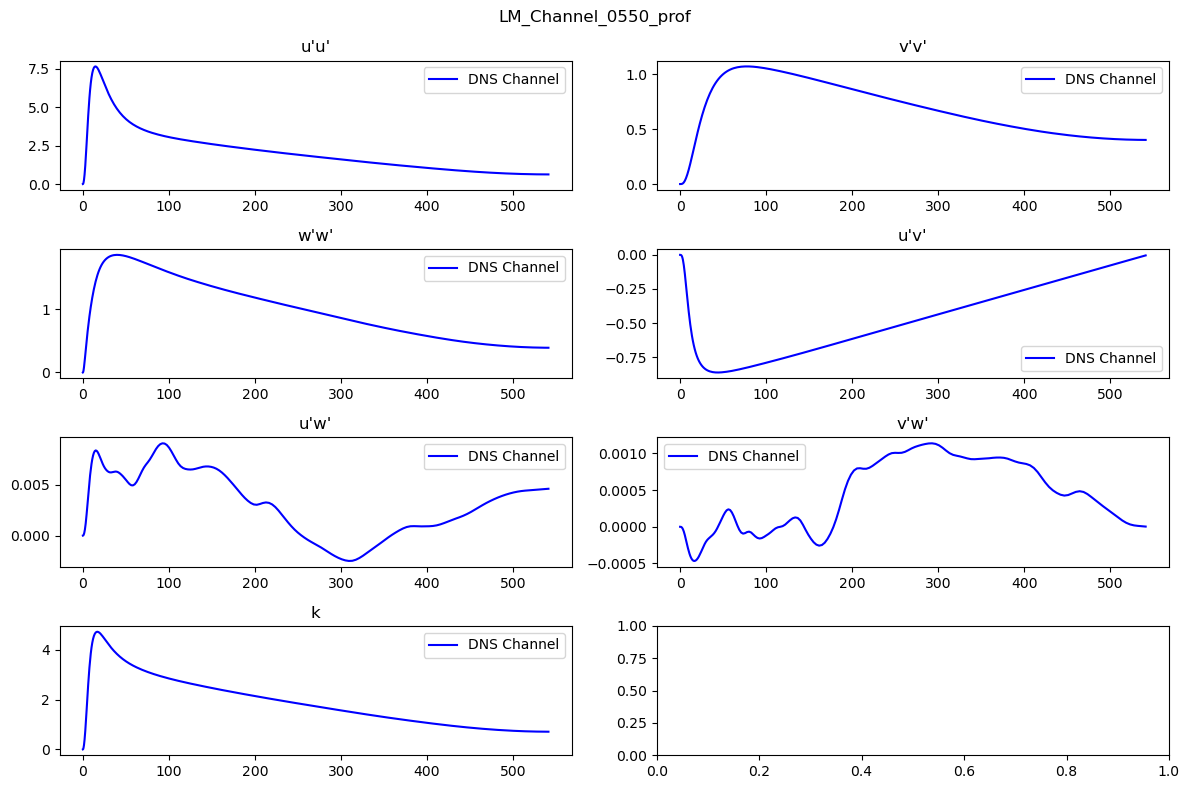

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the CSV files u'u',v'v',w'w',u'w',u'v',v'w',k
data = pd.read_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Channel_data\LM_Channel_0550_prof.csv")
y = data['y^+']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axs = axs.flatten()
 
columns = ["u'u'", "v'v'", "w'w'", "u'v'", "u'w'", "v'w'", "k"]
 
# Plot each column as a subplot
for i, col in enumerate(columns):
    # Ground truth plot
    axs[i].plot(y, data[col], label='DNS Channel', color='blue')
    axs[i].set_title(col)
    axs[i].legend()

plt.suptitle("LM_Channel_0550_prof")
plt.tight_layout()

plt.show()

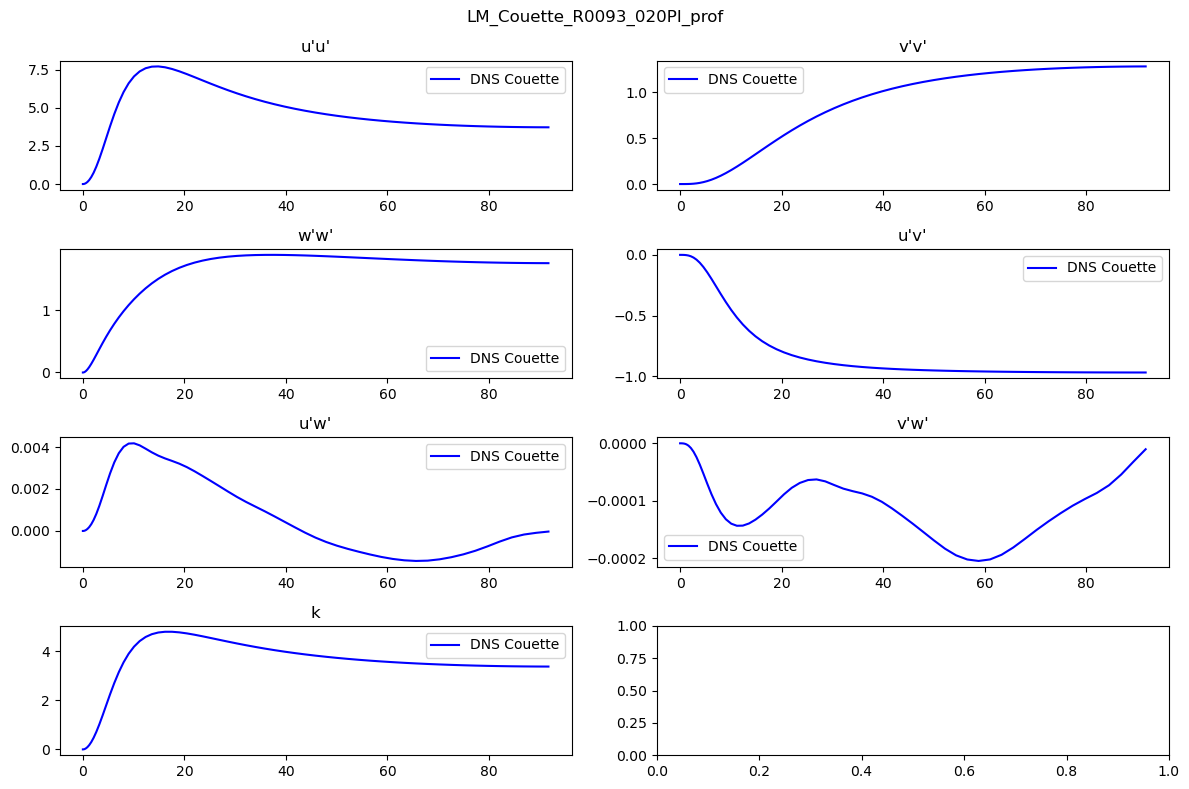

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the CSV files u'u',v'v',w'w',u'w',u'v',v'w',k
data = pd.read_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Couette_data\LM_Couette_R0093_020PI_prof.csv")
y = data['y^+']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axs = axs.flatten()
 
columns = ["u'u'", "v'v'", "w'w'", "u'v'", "u'w'", "v'w'", "k"]
 
# Plot each column as a subplot
for i, col in enumerate(columns):
    # Ground truth plot
    axs[i].plot(y, data[col], label='DNS Couette', color='blue')
    axs[i].set_title(col)
    axs[i].legend()

plt.suptitle("LM_Couette_R0093_020PI_prof")
plt.tight_layout()

plt.show()

# Mirror Data

In an (ideal) real life these data can be approximate as being symmetrical. Therefore, the below function will modify the data at hands for both channel and couette flow in order to have the full behaviour of the flow. 

In [2]:
def process_and_extend_dataset(data_path):
    data = pd.read_csv(data_path)
    file_name = "mirrored_" + data_path.split("\\")[-1].split('.')[0]
    print(file_name)

    # Determine the maximum 'y^+' value
    max_y = data['y^+'].max()
    
    # Select the portion of the data to mirror, which is strictly less than the maximum 'y^+'
    mirrored_data = data[data['y^+'] < max_y].copy()
    
    # Mirror 'y^+' values
    mirrored_data['y^+'] = 2 * max_y - mirrored_data['y^+']
    
    # Mirror other variables as needed
    if "Channel" in file_name:
        max_uv = 2 * data["u'v'"].max()
        mirrored_data["u'v'"] = max_uv - mirrored_data["u'v'"]
    else: # For couette flow
        max_u = 2 * data["U"].max()
        mirrored_data["U"] = max_u - mirrored_data["U"]    
    
    # Concatenate the original data with the mirrored data and reset the index
    extended_data = pd.concat([data, mirrored_data], ignore_index=True)
    
    # Drop duplicates based on all columns
    extended_data = extended_data.drop_duplicates(keep='first')

    extended_data = extended_data.sort_values(by='y^+')

    # Save the dataframe as a csv file
    if "Channel" in file_name:
        extended_data.to_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Channel_data\\" + f"{file_name}.csv", index=False)
    else:    
        extended_data.to_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Couette_data\\" + f"{file_name}.csv", index=False)

In [40]:
file_paths = ['DNS_data\\Channel_data\\LM_Channel_0180_prof.csv', 'DNS_data\\Channel_data\\LM_Channel_0550_prof.csv', 
              'DNS_data\\Channel_data\\LM_Channel_1000_prof.csv', 'DNS_data\\Channel_data\\LM_Channel_2000_prof.csv', 
              'DNS_data\\Channel_data\\LM_Channel_5200_prof.csv', 'DNS_data\\Channel_data\\LM_Channel_4200_prof.csv', 
              'DNS_data\\Channel_data\\LM_Channel_0950_prof.csv', 'DNS_data\\Couette_data\\LM_Couette_R0093_020PI_prof.csv',
              'DNS_data\\Couette_data\\LM_Couette_R0220_020PI_prof.csv', 'DNS_data\\Couette_data\\LM_Couette_R0220_100PI_prof.csv',
              'DNS_data\\Couette_data\\LM_Couette_R0093_100PI_prof.csv', 'DNS_data\Couette_data\LM_Couette_R0500_020PI_prof.csv', 
              'DNS_data\Couette_data\LM_Couette_R0500_100PI_prof.csv']

for file_path in file_paths_:
    full_file_path = f"C:\\Users\\Sohai\\OneDrive - Cranfield University\\GroupProject\\Neural-Network\\{file_path}"
    process_and_extend_dataset(full_file_path)


mirrored_LM_Channel_4200_prof
mirrored_LM_Channel_0950_prof


In [39]:
import numpy as np
data = pd.read_csv(r"C:\Users\Sohai\Downloads\Re4200.prof (1).csv")

data.rename(columns={"u'+": "u'u'", "v'+": "v'v'", "w'+": "w'w'", "uw'+": "u'w'", "uv'+": "u'v'", "vw'+": "v'w'","U+": "U", "p'+": "P", "y+": "y^+"}, inplace=True)
data["k"] = (1/2) * (data["u'u'"] + data["v'v'"] + data["w'w'"])
data["dU/dy"] = np.gradient(data["U"], data["y^+"], edge_order=2)

data.to_csv('LM_Channel_4200_prof.csv', index=False)


## Data Visualization

Visualization of the full behaviour of the channel and couette flow

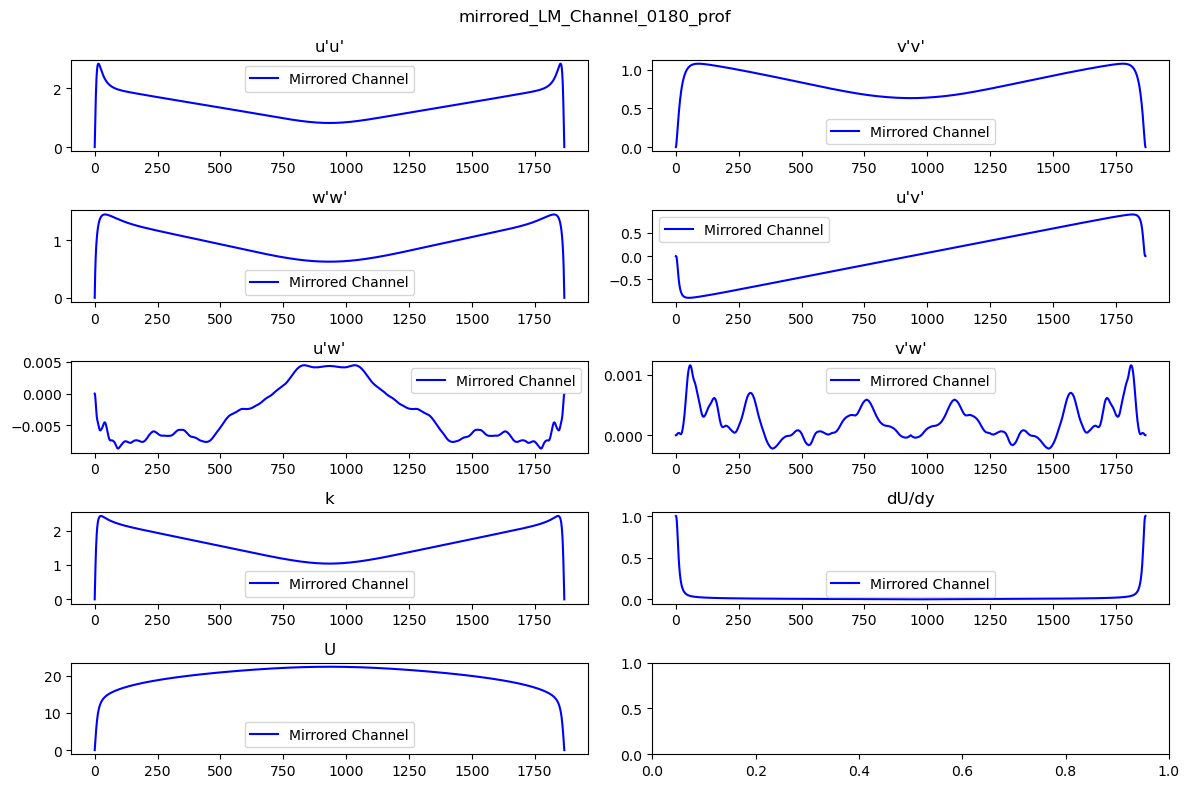

In [3]:
data_mirrored = pd.read_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Channel_data\mirrored_LM_Channel_0950_prof.csv")
 
y = data_mirrored['y^+']

# Create a figure and set of subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))
 
# Flatten the subplots array for easy iteration
axs = axs.flatten()
 
columns = ["u'u'", "v'v'", "w'w'", "u'v'", "u'w'", "v'w'", "k", "dU/dy", "U"]
 
# Plot each column as a subplot
for i, col in enumerate(columns):
    # Ground truth plot
    axs[i].plot(y, data_mirrored[col], label='Mirrored Channel', color='blue')
    axs[i].set_title(col)
    axs[i].legend()

# Adjust layout to prevent overlap of titles
plt.suptitle("mirrored_LM_Channel_0180_prof")
plt.tight_layout()

# Show the plot
plt.show()

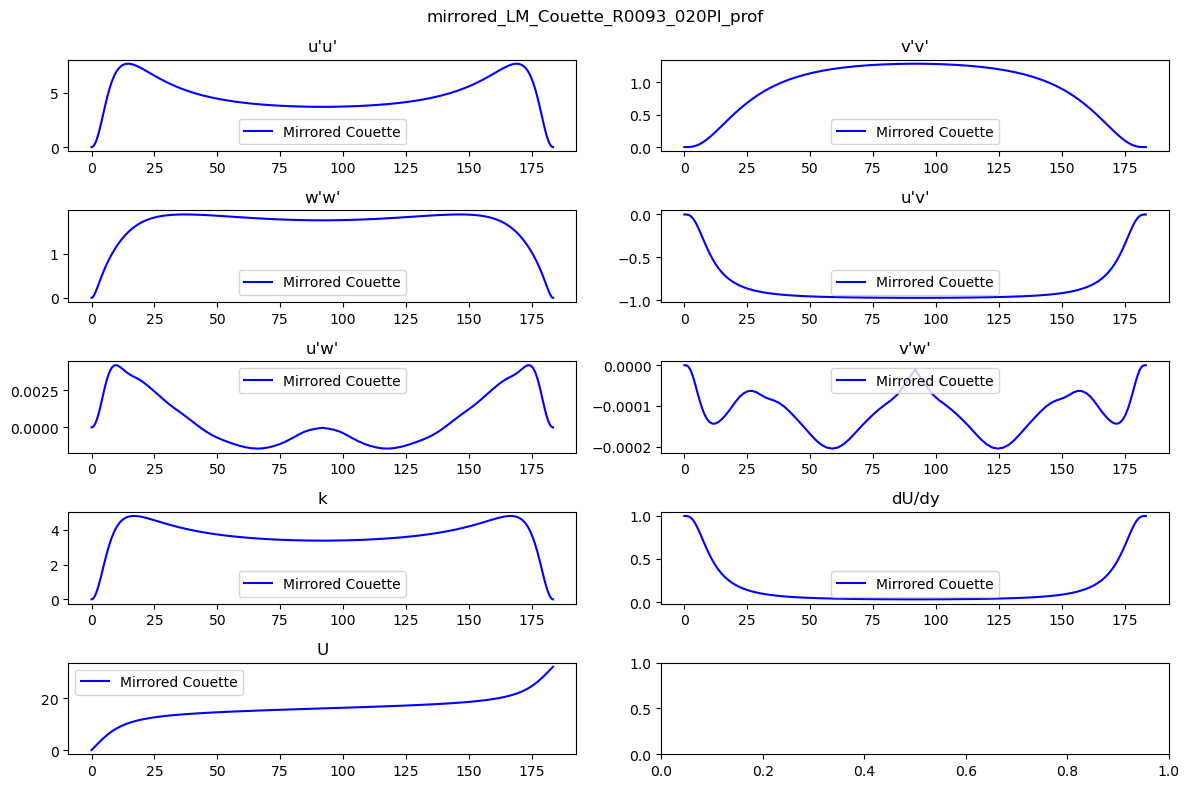

In [162]:
data_mirrored = pd.read_csv(r"C:\Users\Sohai\OneDrive - Cranfield University\GroupProject\Neural-Network\DNS_data\Couette_data\mirrored_LM_Couette_R0093_020PI_prof.csv")
y = data_mirrored['y^+']

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))
 
axs = axs.flatten()
 
columns = ["u'u'", "v'v'", "w'w'", "u'v'", "u'w'", "v'w'", "k", "dU/dy", "U"]
 
for i, col in enumerate(columns):
    # Ground truth plot
    axs[i].plot(y, data_mirrored[col], label='Mirrored Couette', color='blue')
    axs[i].set_title(col)
    axs[i].legend()

plt.suptitle("mirrored_LM_Couette_R0093_020PI_prof")
plt.tight_layout()

plt.show()